In [264]:
import pandas as pd
import seaborn as sns
%matplotlib inline
# turn of warning messages
pd.options.mode.chained_assignment = None  # default='warn'

# get data
df1 = pd.read_csv('APYpreProcessedData.csv')


In [265]:
def describe_dataframe(df=pd.DataFrame()):
    """This function generates descriptive stats of a dataframe
    Args:
        df (dataframe): the dataframe to be analyzed
    Returns:
        None

    """
    print("\n\n")
    print("*"*30)
    print("About the Data")
    print("*"*30)
    
    print("Number of rows::",df.shape[0])
    print("Number of columns::",df.shape[1])
    print("\n")
    
    print("Column Names::",df.columns.values.tolist())
    print("\n")
    
    print("Column Data Types::\n",df.dtypes)
    print("\n")
    
    print("Columns with Missing Values::",df.columns[df.isnull().any()].tolist())
    print("\n")
    
    print("Number of rows with Missing Values::",len(pd.isnull(df).any(1).nonzero()[0].tolist()))
    print("\n")
    
    print("Sample Indices with missing data::",pd.isnull(df).any(1).nonzero()[0].tolist()[0:5])
    print("\n")
    
    print("General Stats::")
    print(df.info())
    print("\n")
    
    print("Summary Stats::")
    print(df.describe())
    print("\n")
    
    print("Dataframe Sample Rows::")
    display(df.head(5))

In [266]:
%time describe_dataframe(df1)




******************************
About the Data
******************************
Number of rows:: 195383
Number of columns:: 8


Column Names:: ['State', 'District', 'Crop', 'Year', 'Season', 'Area (Hectare)', 'Production (Tonnes)', 'Yield (Tonnes/Hectare)']


Column Data Types::
 State                      object
District                   object
Crop                       object
Year                        int64
Season                     object
Area (Hectare)            float64
Production (Tonnes)       float64
Yield (Tonnes/Hectare)    float64
dtype: object


Columns with Missing Values:: []


Number of rows with Missing Values:: 0


Sample Indices with missing data:: []


General Stats::
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195383 entries, 0 to 195382
Data columns (total 8 columns):
State                     195383 non-null object
District                  195383 non-null object
Crop                      195383 non-null object
Year                      195383 non-null 

,State,District,Crop,Year,Season,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
0,Andaman and Nicobar Islands,North And Middle Andaman,Arhar/Tur,2010,Rabi,294.5,91.0,0.31
1,Andaman and Nicobar Islands,North And Middle Andaman,Arhar/Tur,2011,Rabi,210.0,63.0,0.30
2,Andaman and Nicobar Islands,North And Middle Andaman,Arhar/Tur,2012,Rabi,52.5,15.0,0.29
3,Andaman and Nicobar Islands,North And Middle Andaman,Arhar/Tur,2013,Rabi,1.0,3.0,3.00
4,Andaman and Nicobar Islands,North And Middle Andaman,Arhar/Tur,2014,Rabi,13.9,14.0,0.99


CPU times: user 331 ms, sys: 28.9 ms, total: 360 ms
Wall time: 357 ms


In [267]:
df1.columns

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area (Hectare)',
       'Production (Tonnes)', 'Yield (Tonnes/Hectare)'],
      dtype='object')

In [268]:
df2=df1[df1.State=="Chhattisgarh"]

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


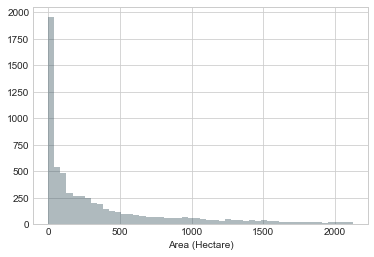

In [269]:
filtered = df2['Area (Hectare)'][(df2['Area (Hectare)'] >= 0) & (df2['Area (Hectare)'] < 2121.500000)]
sns.distplot(filtered,kde=False,bins=50,hist_kws={"range": [0,2121.500000]})

In [270]:
df2.describe()

,Year,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
count,8666.00000,8666.000000,8.666000e+03,8666.000000
mean,2008.30210,10069.546619,1.223333e+04,1.127989
std,4.67226,43070.264192,6.563784e+04,2.057060
min,2000.00000,1.000000,0.000000e+00,0.000000
25%,2004.00000,56.000000,2.900000e+01,0.280000
50%,2009.00000,356.000000,2.020000e+02,0.400000
75%,2012.00000,2121.500000,1.257250e+03,1.080000
max,2015.00000,545965.000000,2.129180e+06,71.000000


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


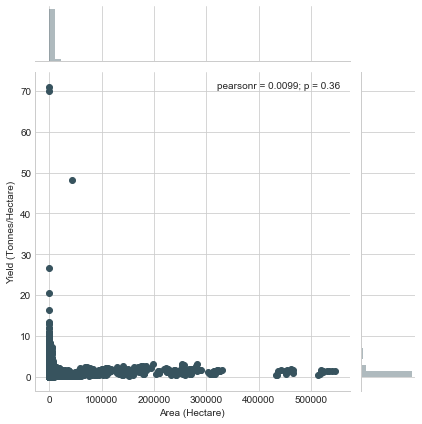

In [271]:
#area
sns.jointplot(x='Area (Hectare)',y='Yield (Tonnes/Hectare)',data=df2,kind='scatter')

In [272]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195383 entries, 0 to 195382
Data columns (total 8 columns):
State                     195383 non-null object
District                  195383 non-null object
Crop                      195383 non-null object
Year                      195383 non-null int64
Season                    195383 non-null object
Area (Hectare)            195383 non-null float64
Production (Tonnes)       195383 non-null float64
Yield (Tonnes/Hectare)    195383 non-null float64
dtypes: float64(3), int64(1), object(4)
memory usage: 11.9+ MB


In [273]:
df1[df1.State=='Chhattisgarh'].sample()

,State,District,Crop,Year,Season,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
41424,Chhattisgarh,Kondagaon,Linseed,2011,Rabi,248.0,104.0,0.42


In [274]:
df3=df1.copy()
#df3=df3[(df3.State.str.contains('Rajasthan')) & (df3.District.str.contains('Tonk')) & (df3.Season.str.contains('Kharif')) & (df3.Crop=='Bajra')]
df3=df3[(df3.State=='Chhattisgarh')  & (df3.Season=='Kharif') & (df3.Crop=='Rice')]


In [275]:
df3[(df3.State=='Chhattisgarh')  & (df3.District=='Bilaspur') & (df3.Season=='Kharif') & (df3.Crop=='Rice')]['Crop'].value_counts()

Rice    16
Name: Crop, dtype: int64

In [276]:
df3

,State,District,Crop,Year,Season,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare)
44342,Chhattisgarh,Balod,Rice,2011,Kharif,177115.0,327525.0,1.85
44343,Chhattisgarh,Balod,Rice,2012,Kharif,177182.0,357486.0,2.02
44344,Chhattisgarh,Balod,Rice,2013,Kharif,181677.0,291899.0,1.61
44345,Chhattisgarh,Balod,Rice,2014,Kharif,183795.0,348670.0,1.90
44346,Chhattisgarh,Balod,Rice,2015,Kharif,179085.0,194925.0,1.09
44347,Chhattisgarh,Baloda Bazar,Rice,2011,Kharif,225302.0,264652.0,1.17
44348,Chhattisgarh,Baloda Bazar,Rice,2012,Kharif,222135.0,382025.0,1.72
44349,Chhattisgarh,Baloda Bazar,Rice,2013,Kharif,223120.0,324941.0,1.46
44350,Chhattisgarh,Baloda Bazar,Rice,2014,Kharif,238360.0,383684.0,1.61
44351,Chhattisgarh,Baloda Bazar,Rice,2015,Kharif,239456.0,339816.0,1.42


In [277]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [278]:
df4=df3[df3.Season == 'Kharif'].groupby(['State','District','Crop'])['Year'].count().reset_index()

In [279]:
df5=df4[df4.Year>10]

In [280]:
df5.head()

,State,District,Crop,Year
3,Chhattisgarh,Bastar,Rice,16
6,Chhattisgarh,Bilaspur,Rice,16
7,Chhattisgarh,Dantewada,Rice,16
8,Chhattisgarh,Dhamtari,Rice,16
9,Chhattisgarh,Durg,Rice,16


In [281]:
q=pd.merge(df1, df5, on=['State','District','Crop'], how='inner')

In [282]:
q.head()

,State,District,Crop,Year_x,Season,Area (Hectare),Production (Tonnes),Yield (Tonnes/Hectare),Year_y
0,Chhattisgarh,Bastar,Rice,2000,Kharif,258336.0,213319.0,0.83,16
1,Chhattisgarh,Bastar,Rice,2001,Kharif,260224.0,385963.0,1.48,16
2,Chhattisgarh,Bastar,Rice,2002,Kharif,258955.0,128736.0,0.50,16
3,Chhattisgarh,Bastar,Rice,2003,Kharif,260206.0,439318.0,1.69,16
4,Chhattisgarh,Bastar,Rice,2004,Kharif,260826.0,327311.0,1.25,16


/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


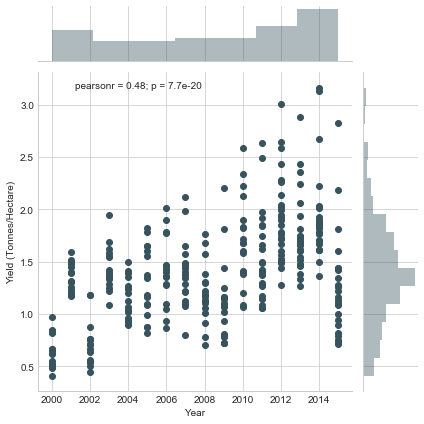

In [283]:
# More time on site, more money spent.
sns.jointplot(x='Year',y='Yield (Tonnes/Hectare)',data=df3)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


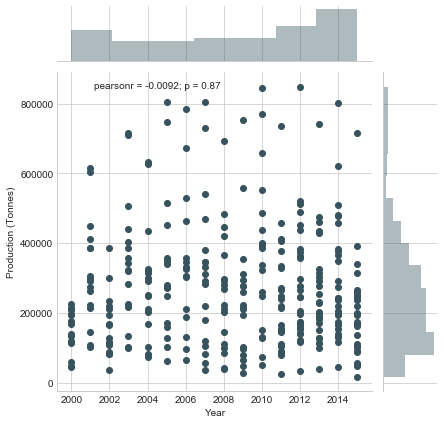

In [284]:
sns.jointplot(x='Year',y='Production (Tonnes)',data=df3)

/usr/local/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6448: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


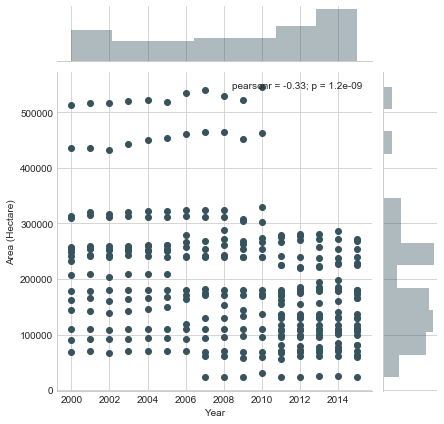

In [285]:
sns.jointplot(x='Year',y='Area (Hectare)',data=df3)

In [286]:
#data=df3[['Year','Yield (Tonnes/Hectare)']]
data=q[['Year_x','State', 'District', 'Crop','Yield (Tonnes/Hectare)']]

In [287]:
data.reset_index(drop=True,inplace=True)
data.set_index('Year_x',inplace=True)
data.index = pd.to_datetime(data.index, format="%Y")
data.head()

,State,District,Crop,Yield (Tonnes/Hectare)
Year_x,,,,
2000-01-01,Chhattisgarh,Bastar,Rice,0.83
2001-01-01,Chhattisgarh,Bastar,Rice,1.48
2002-01-01,Chhattisgarh,Bastar,Rice,0.50
2003-01-01,Chhattisgarh,Bastar,Rice,1.69
2004-01-01,Chhattisgarh,Bastar,Rice,1.25


In [244]:
import pandas as pd
from pandas.plotting import autocorrelation_plot
import numpy as np
from matplotlib import pyplot
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [291]:
data1 = data[(data['Crop']=='Rice') & (data['District']=='Bilaspur') & (data['State']=='Chhattisgarh')]

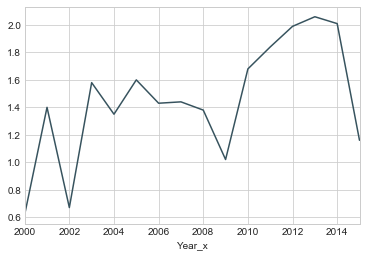

In [292]:
data1['Yield (Tonnes/Hectare)'].plot()
pyplot.show()

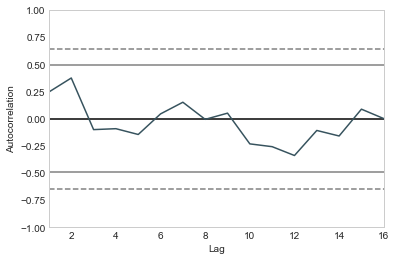

In [293]:
autocorrelation_plot(data1['Yield (Tonnes/Hectare)'])
pyplot.show()

                                ARIMA Model Results                                 
Dep. Variable:     D.Yield (Tonnes/Hectare)   No. Observations:                   15
Model:                       ARIMA(4, 1, 0)   Log Likelihood                  -6.310
Method:                             css-mle   S.D. of innovations              0.351
Date:                      Fri, 09 Mar 2018   AIC                             24.621
Time:                              13:30:16   BIC                             28.869
Sample:                          01-01-2001   HQIC                            24.575
                               - 01-01-2015                                         
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0410      0.045      0.915      0.382      -0.047       0.129
ar.L1.D.Yield (Tonnes/H

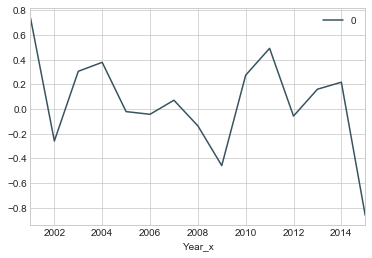

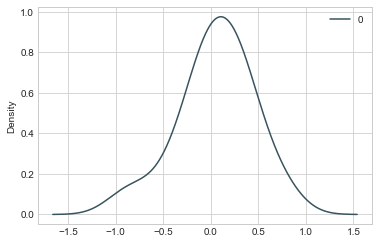

               0
count  15.000000
mean    0.053640
std     0.394181
min    -0.860885
25%    -0.096342
50%     0.071319
75%     0.289895
max     0.738987


In [295]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

# fit model
model = ARIMA(data1['Yield (Tonnes/Hectare)'], order=(4,1,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())
# plot residual errors
residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())


/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


predicted=1.957582, expected=1.990000
predicted=1.846513, expected=2.060000
predicted=1.976514, expected=2.010000
predicted=2.067858, expected=1.160000
Test MSE: 0.218


/usr/local/lib/python3.6/site-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


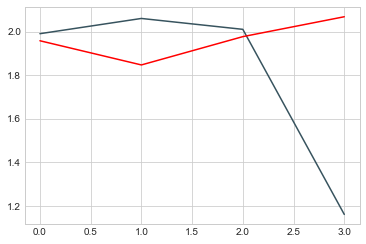

In [298]:
from pandas import read_csv
from pandas import datetime
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error

series = data1['Yield (Tonnes/Hectare)']
X = series.values
size = int(len(X) * 0.80)
#size = len(X)-1
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(4,1,0))
	model_fit = model.fit(disp=0, transparams=False)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [ ]:
data1.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [ ]:
#Identifying Trends in Time Series
data.rolling(2).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);

In [ ]:
#Seasonal Patterns in Time Series Data
data.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20);